In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.style as style
style.available

import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('train.csv', header = 0, dtype={'Age': np.float64})
test  = pd.read_csv('test.csv' , header = 0, dtype={'Age': np.float64})

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df.groupby(by=['Pclass'])['Survived'].agg(['mean','count'])

,mean,count
Pclass,,
1,0.629630,216
2,0.472826,184
3,0.242363,491


In [7]:
sex_survived= df.groupby(by=['Sex','Survived'])['Survived'].agg(['count']).reset_index()
sex_survived

,Sex,Survived,count
0,female,0,81
1,female,1,233
2,male,0,468
3,male,1,109


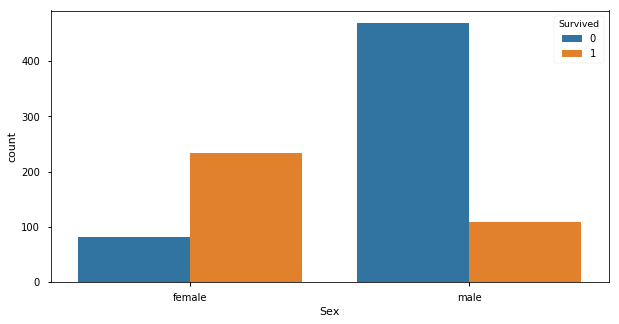

In [8]:
plt.figure(figsize=(10, 5))
style.use('seaborn-notebook')
sns.barplot(data=sex_survived, x='Sex',y='count', hue='Survived');

In [9]:
df_all = [df,test]

In [10]:
for data in df_all:
    print("\n -------- {data.index } ------- \n")
    print(data.isnull().sum())


 -------- {data.index } ------- 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 -------- {data.index } ------- 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [11]:
for data in df_all:
    data['isAlone']=1

    data['Family_No'] = data['Parch'] + data['SibSp'] + 1
        
    data['isAlone'].loc[data['Family_No']>1]=0
    
    data['Age'].fillna(data['Age'].mean(), inplace=True)

    data['Embarked'].fillna(data['Embarked'].mode().iloc[0], inplace=True)
    
    data['Fare'].fillna(data['Fare'].mean(), inplace=True)
    

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [12]:
test.isAlone.value_counts()

1    253
0    165
Name: isAlone, dtype: int64

In [13]:
for data in df_all:
    data.drop(columns=['PassengerId','Name','Cabin','Ticket','SibSp','Parch'],inplace=True,axis=1)

In [14]:
for data in df_all:
    print("\n -------- {data.index } ------- \n")
    print(data.isnull().sum())


 -------- {data.index } ------- 

Survived     0
Pclass       0
Sex          0
Age          0
Fare         0
Embarked     0
isAlone      0
Family_No    0
dtype: int64

 -------- {data.index } ------- 

Pclass       0
Sex          0
Age          0
Fare         0
Embarked     0
isAlone      0
Family_No    0
dtype: int64


In [15]:
test = pd.get_dummies(test,columns=['Sex','Embarked'])
df = pd.get_dummies(df,columns=['Sex','Embarked'])

In [16]:
df.head()

,Survived,Pclass,Age,Fare,isAlone,Family_No,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,0,2,0,1,0,0,1
1,1,1,38.0,71.2833,0,2,1,0,1,0,0
2,1,3,26.0,7.9250,1,1,1,0,0,0,1
3,1,1,35.0,53.1000,0,2,1,0,0,0,1
4,0,3,35.0,8.0500,1,1,0,1,0,0,1


In [17]:
y=df['Survived']
X=df.drop(columns=['Survived'],axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [19]:
DT= DecisionTreeClassifier()
DT.fit(X_train, y_train)
DT.score(X_test,y_test)

0.7611940298507462

In [20]:
parameters1 = [{'max_depth':np.linspace(1, 15, 15),'min_samples_split': np.linspace(0.1, 1.0, 5, endpoint=True)}]

In [21]:
from sklearn.model_selection import GridSearchCV

Grid1 = GridSearchCV(DT, parameters1, cv=4,return_train_score=True)
Grid1.fit(X_train,y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15.]),
      

In [22]:
scores = Grid1.cv_results_

In [23]:
for param, mean_train in zip(scores['params'],scores['mean_train_score']):
    print("{param} accuracy on training data is {mean_train}")

{param} accuracy on training data is {mean_train}
{param} accuracy on training data is {mean_train}
{param} accuracy on training data is {mean_train}
{param} accuracy on training data is {mean_train}
{param} accuracy on training data is {mean_train}
{param} accuracy on training data is {mean_train}
{param} accuracy on training data is {mean_train}
{param} accuracy on training data is {mean_train}
{param} accuracy on training data is {mean_train}
{param} accuracy on training data is {mean_train}
{param} accuracy on training data is {mean_train}
{param} accuracy on training data is {mean_train}
{param} accuracy on training data is {mean_train}
{param} accuracy on training data is {mean_train}
{param} accuracy on training data is {mean_train}
{param} accuracy on training data is {mean_train}
{param} accuracy on training data is {mean_train}
{param} accuracy on training data is {mean_train}
{param} accuracy on training data is {mean_train}
{param} accuracy on training data is {mean_train}


In [24]:
Grid1.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3.0,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [25]:
max(scores['mean_train_score'])

0.8330656673804426

In [26]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [27]:
RF = RandomForestClassifier()
XGB = XGBClassifier()

In [28]:
parameters2 = [{'max_depth':np.linspace(1, 15, 15),'min_samples_split': np.linspace(0.1, 1.0, 5, endpoint=True)}]

parameters3 =[{"learning_rate": [0.05, 0.10, 0.15, 0.20] ,"max_depth": [ 3, 4, 5, 6, 8, 10], "min_child_weight": [3,5,7],"gamma": [ 0.0, 0.1, 0.2 ,0.3],"colsample_bytree" : [ 0.4, 0.5]}]

In [29]:
Grid1 = GridSearchCV(XGB, parameters3, cv=3,return_train_score=True)

Grid1.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid=[{'colsample_bytree': [0.4, 0.5],
                          'gamma': [0.0, 0.1, 0.2, 0.3],
                          'learning_rate': [0.05, 0.

In [30]:
scores = Grid1.cv_results_

In [31]:
Grid1.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2,
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [32]:
max(scores['mean_train_score'])

0.9205456441149211

In [33]:
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=5, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [34]:
XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

In [35]:
XGB.score(X_test,y_test)

0.832089552238806

In [36]:
Grid1 = GridSearchCV(RF, parameters2, cv=3,return_train_score=True)

Grid1.fit(X_train,y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will chan

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [37]:
scores = Grid1.cv_results_

In [38]:
Grid1.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3.0, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.325,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
max(scores['mean_train_score'])

0.8322771856657399

In [40]:
pred = XGB.predict(test)

In [41]:
result = pd.DataFrame(pred,columns=['Survived'])

In [42]:
test  = pd.read_csv('test.csv' , header = 0, dtype={'Age': np.float64})

In [43]:
submission = result.join(test['PassengerId']).iloc[:,::-1]

In [44]:
submission.to_csv('submission.csv', index=False)